# **LABORATORIO DE ARBOLES Y GRAFOS**

## 1015066047 - Sarai Restrepo Rodriguez
## 1045076775 - Santiago Palacio Cardenas
## Jesus Mateo Blandon Mesa 

# **Arboles**

Implementa un programa en Python que permita gestionar un árbol binario de búsqueda con las siguientes opciones:

**Opción 1:** Insertar Números en el Árbol

El usuario debe poder ingresar una serie de números que se insertarán en un árbol binario de búsqueda. La inserción debe seguir la regla clásica de estos árboles: los números mayores deben colocarse en el subárbol derecho y los números menores en el subárbol izquierdo. Esta opción permite al usuario construir el árbol inicial.

**Opción 2:** Balancear el Árbol

Después de que el usuario haya ingresado todos los números, el programa debe verificar si el árbol está balanceado. Si el árbol no está balanceado, el programa debe aplicar las rotaciones necesarias hacia la izquierda o hacia la derecha para convertirlo en un árbol balanceado. Un árbol está balanceado si la diferencia de altura entre el subárbol izquierdo y el subárbol derecho de cualquier nodo no supera 1.

In [ ]:
import matplotlib.pyplot as plt

class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierda = None
        self.derecha = None

class ArbolBinario:
    def __init__(self):
        self.raiz = None

    def insertar(self, valor):
        nuevoNodo = Nodo(valor)
        
        if self.raiz is None:
            self.raiz = nuevoNodo
            
        else:
            actual = self.raiz
            while actual:
                padre = actual
                if valor < actual.valor:
                    actual = actual.izquierda
                    
                else:
                    actual = actual.derecha
                    
            if valor < padre.valor:
                padre.izquierda = nuevoNodo
                
            else:
                padre.derecha = nuevoNodo

    def recorridoInordenNoRecursivo(self):
        pila = []
        actual = self.raiz
        valores = []

        while pila or actual:
            if actual:
                pila.append(actual)
                actual = actual.izquierda
                
            else:
                actual = pila.pop()
                valores.append(actual.valor)
                actual = actual.derecha

        return valores

    def recorridoPreordenNoRecursivo(self):
        if self.raiz is None:
            return

        pila = []
        pila.append(self.raiz)

        while pila:
            nodo = pila.pop()
            print(nodo.valor, end=' ')

            if nodo.derecha:
                pila.append(nodo.derecha)
                
            if nodo.izquierda:
                pila.append(nodo.izquierda)

    def balancear(self):
        if not self.estaBalanceado(self.raiz):
            valoresOrdenados = self.recorridoInordenNoRecursivo()
            self.raiz = self.crearArbolBalanceado(valoresOrdenados)

    def crearArbolBalanceado(self, valoresOrdenados):
        if not valoresOrdenados:
            return None
        
        mid = len(valoresOrdenados) // 2
        nodo = Nodo(valoresOrdenados[mid])
        nodo.izquierda = self.crearArbolBalanceado(valoresOrdenados[:mid])
        nodo.derecha = self.crearArbolBalanceado(valoresOrdenados[mid + 1:])
        
        return nodo

    def estaBalanceado(self, nodo):
        if nodo is None:
            return True

        alturaIzquierda = self.altura(nodo.izquierda)
        alturaDerecha = self.altura(nodo.derecha)

        if abs(alturaIzquierda - alturaDerecha) <= 1 and self.estaBalanceado(nodo.izquierda) and self.estaBalanceado(nodo.derecha):
            return True

        return False

    def altura(self, nodo):
        if nodo is None:
            return 0
        
        return max(self.altura(nodo.izquierda), self.altura(nodo.derecha)) + 1

    def graficarArbol(self):
        if not self.raiz:
            print("El árbol está vacío.")
            return

        def recorrerNodos(nodo, x, y, dx, posiciones, conexiones):
            if nodo:
                posiciones[nodo.valor] = (x, y)
                
                if nodo.izquierda:
                    conexiones.append((nodo.valor, nodo.izquierda.valor))
                    recorrerNodos(nodo.izquierda, x - dx, y - 1, dx / 2, posiciones, conexiones)
                    
                if nodo.derecha:
                    conexiones.append((nodo.valor, nodo.derecha.valor))
                    recorrerNodos(nodo.derecha, x + dx, y - 1, dx / 2, posiciones, conexiones)

        posiciones = {}
        conexiones = []
        
        recorrerNodos(self.raiz, 0, 0, 1, posiciones, conexiones)

        for valor, (x, y) in posiciones.items():
            plt.scatter(x, y, s=500, zorder=2)
            plt.text(x, y, str(valor), ha='center', va='center', fontsize=12, zorder=3)

        for de, a in conexiones:
            x1, y1 = posiciones[de]
            x2, y2 = posiciones[a]
            plt.plot([x1, x2], [y1, y2], 'k-', zorder=1)

        plt.axis('off')
        plt.show()

def gestionarArbol():
    arbol = ArbolBinario()

    while True:
        print("Opciones:")
        print("1. Insertar números en el árbol")
        print("2. Balancear el árbol")
        print("3. Graficar árbol")
        print("4. Salir")

        opcion = input("Seleccione una opción: ")

        if opcion == "1":
            numeros = input("Ingrese los números separados por espacios: ")
            for num in map(int, numeros.split()):
                arbol.insertar(num)
            print("Números insertados en el árbol (sin balancear): ", numeros.split())

        elif opcion == "2":
            arbol.balancear()
            print("Árbol balanceado en recorrido preorden:")
            arbol.recorridoPreordenNoRecursivo()
            print()

        elif opcion == "3":
            print("\nRepresentación gráfica del árbol:")
            arbol.graficarArbol()

        elif opcion == "4":
            print("Programa finalizado.")
            break

        else:
            print("Opción no válida. Intente de nuevo.")


gestionarArbol()

# Red Social

Implementa un programa en Python que permita simular una red social utilizando las bibliotecas NetworkX y Matplotlib. El programa debe seguir los siguientes requerimientos:

**Generación de la Red Social:**


* Crea una red social con 100 miembros representados como nodos de un grafo.
* Cada miembro debe tener un número aleatorio de amigos (es decir, conexiones o aristas en el grafo) que varíe entre 5 y 10 amigos.
* Genera las conexiones de manera aleatoria, asegurando que cada miembro tenga la cantidad de amigos especificada.

**Visualización de la Red:** Utiliza Matplotlib para visualizar el grafo creado, mostrando los miembros y sus conexiones de amistad.

**Búsqueda de Amigos en Común:**

* El algoritmo debe tener la capacidad de recibir como entrada los nombres (o identificadores) de dos personas de la red y mostrar sus amigos en común.
* Muestra los amigos en común en la consola y destaca, si es posible, las conexiones compartidas en la visualización del grafo para que sean identificables en la gráfica generada.







Amigos en común entre 5 y 7: {45}


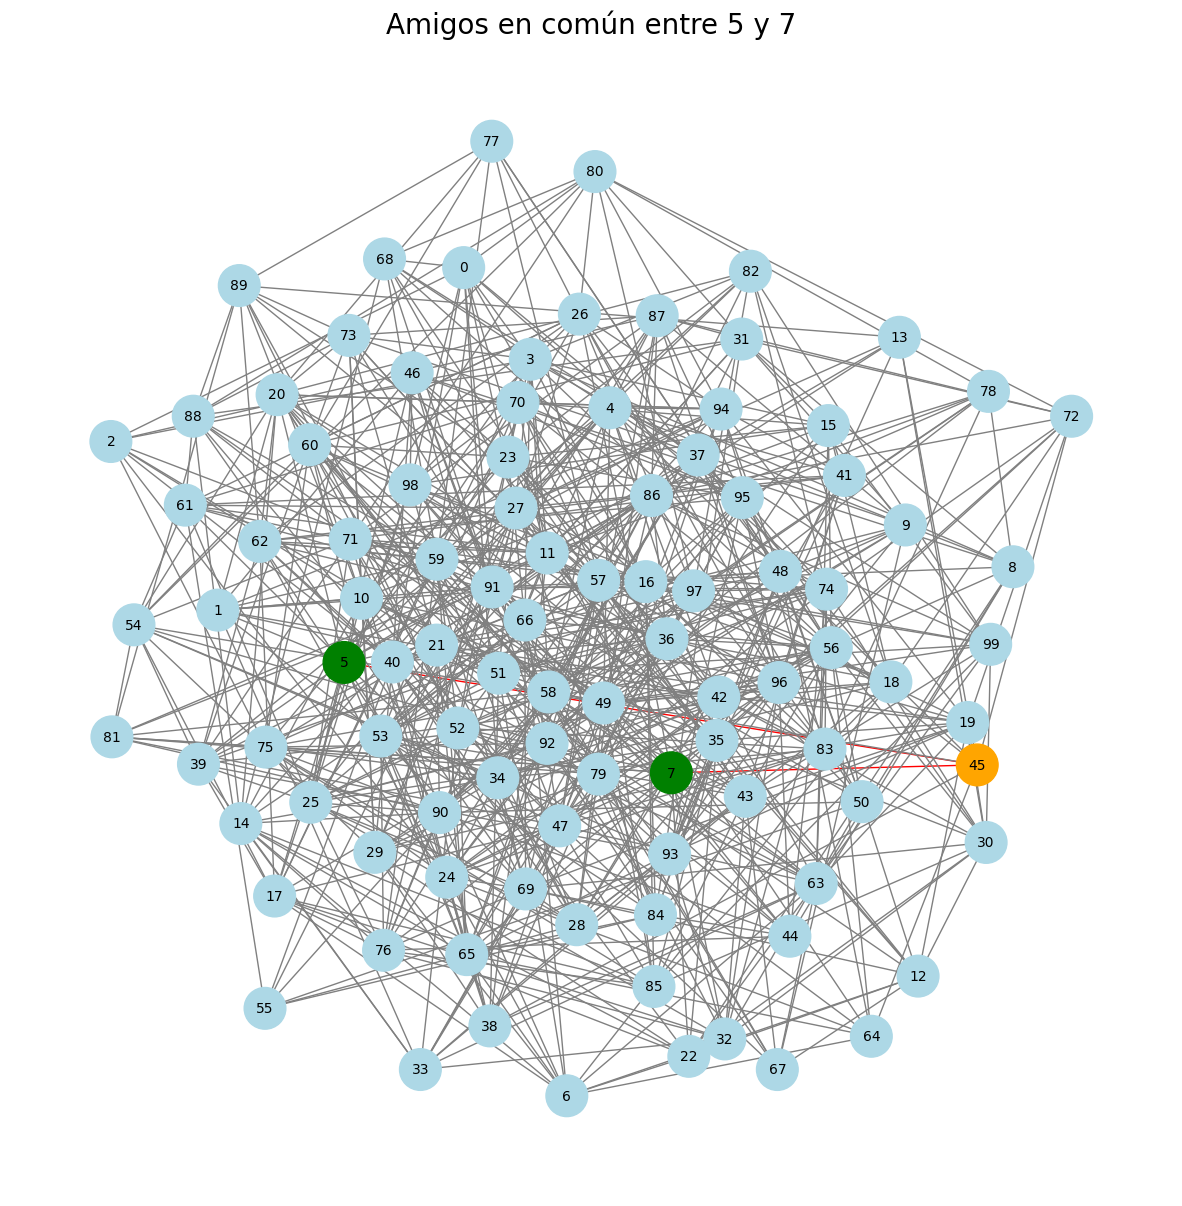

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import random

def crearGrafo():
    grafo = nx.Graph()
    
    for id in range(100):
        grafo.add_node(id)
        
    return grafo

def agregarConexionesAleatorias(grafo):
    nodos = list(grafo.nodes)
    
    for nodo in nodos:
        conexiones = random.randint(5, 10)
        posiblesAmigos = set(nodos) - {nodo}
        amigos = random.sample(sorted(posiblesAmigos), min(conexiones, len(posiblesAmigos)))
        
        for amigo in amigos:
            grafo.add_edge(nodo, amigo)

def encontrarAmigosComunes(grafo, amigoA, amigoB):
    amigosPersonaA = set(grafo.neighbors(amigoA))
    amigosPersonaB = set(grafo.neighbors(amigoB))
    amigosComunes = amigosPersonaA.intersection(amigosPersonaB)
    
    return amigosComunes

def dibujarGrafoConAmigos(grafo, amigoA, amigoB, amigosComunes):
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(grafo)

    coloresNodos = []
    
    for nodo in grafo.nodes:
        if nodo == amigoA or nodo == amigoB:
            coloresNodos.append("green")
            
        elif nodo in amigosComunes:
            coloresNodos.append("orange")
            
        else:
            coloresNodos.append("lightblue")

    coloresAristas = []
    
    for u, v in grafo.edges:
        if (u in amigosComunes and v in amigosComunes) or (u in amigosComunes and (v == amigoA or v == amigoB)) or (v in amigosComunes and (u == amigoA or u == amigoB)):
            coloresAristas.append("red")
            
        else:
            coloresAristas.append("gray")

    nx.draw_networkx_nodes(grafo, pos, node_color=coloresNodos, node_size=900)
    nx.draw_networkx_edges(grafo, pos, edge_color=coloresAristas)
    nx.draw_networkx_labels(grafo, pos, font_size=10)

    plt.title(f"Amigos en común entre {amigoA} y {amigoB}", fontsize=20)
    plt.axis("off")
    plt.show()


grafo = crearGrafo()
agregarConexionesAleatorias(grafo)

amigoA = int(input("Ingrese id de la primera persona (número entre 0 y 99): "))
amigoB = int(input("Ingrese id de la segunda persona (número entre 0 y 99): "))
amigosComunes = encontrarAmigosComunes(grafo, amigoA, amigoB)

print(f"Amigos en común entre {amigoA} y {amigoB}: {amigosComunes}")
dibujarGrafoConAmigos(grafo, amigoA, amigoB, amigosComunes)